In [ ]:
# notebook to test the in-house histogram cleaning algorithm

import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import dxchange

from __code.utilities.images import replace_pixels
from numpy import histogram
from scipy.ndimage import median_filter

In [4]:
input_folder = "/SNS/VENUS/IPTS-33699/shared/autoreduce/mcp/September20_2024_PurpleCar_GoldenRatio_CT_5_0_C_Cd_inBeam_Resonance/Run_3032"
assert os.path.exists(input_folder), f"Input folder does not exist: {input_folder}"

In [9]:
# load tiff files
list_tiff = glob.glob(os.path.join(input_folder, "*.tif"))
assert len(list_tiff) > 0, "No tiff files found in the input folder"

In [13]:
data = []
for tiff_file in list_tiff:
    img = dxchange.read_tiff(tiff_file)
    data.append(img)

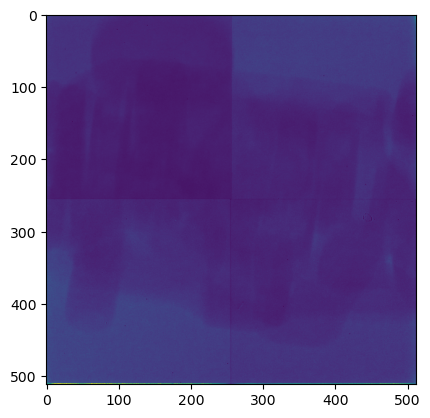

In [69]:
data = np.array(data)
np.shape(data)

integrated_data = np.sum(data, axis=0)
plt.imshow(integrated_data)

(array([2.0000e+01, 1.0000e+00, 7.0000e+00, 5.0000e+00, 8.0000e+00,
        4.0000e+02, 6.5670e+03, 1.7287e+04, 1.8784e+04, 3.1588e+04,
        3.9258e+04, 2.5349e+04, 1.7690e+04, 1.5353e+04, 1.6307e+04,
        1.4203e+04, 1.2571e+04, 1.5248e+04, 1.2825e+04, 8.4390e+03,
        4.7380e+03, 2.2420e+03, 9.7200e+02, 4.7300e+02, 2.7400e+02,
        1.9900e+02, 1.0800e+02, 8.7000e+01, 5.6000e+01, 3.7000e+01,
        2.5000e+01, 1.8000e+01, 1.1000e+01, 4.0000e+00, 2.2000e+01,
        2.2000e+01, 2.1000e+01, 1.2000e+01, 1.8000e+01, 1.2000e+01,
        1.5000e+01, 7.0000e+00, 2.0000e+01, 8.0000e+00, 1.1000e+01,
        6.0000e+00, 1.6000e+01, 1.0000e+01, 7.0000e+00, 1.5000e+01,
        1.8000e+01, 1.7000e+01, 1.5000e+01, 1.6000e+01, 2.0000e+01,
        1.8000e+01, 1.0000e+01, 1.7000e+01, 2.0000e+01, 1.9000e+01,
        2.1000e+01, 2.4000e+01, 1.5000e+01, 1.9000e+01, 2.4000e+01,
        2.3000e+01, 1.7000e+01, 3.1000e+01, 3.1000e+01, 2.8000e+01,
        4.1000e+01, 3.3000e+01, 3.5000e+01, 2.80

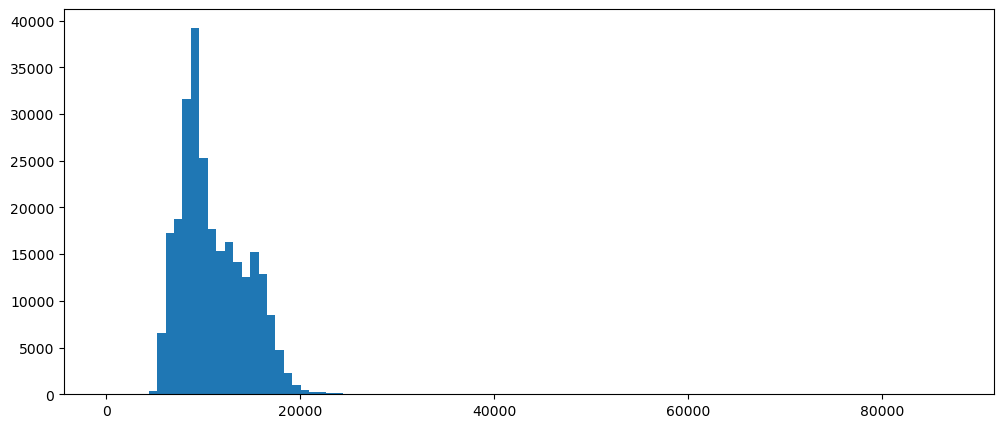

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.hist(integrated_data.flatten(), bins=100)

In [ ]:
histogram_data, bin_edges = histogram(np.sum(data, axis=0), bins=1000)
thres_low = bin_edges[500]
thres_hight = bin_edges[-2]
print(f"Low threshold: {thres_low}")
print(f"High threshold: {thres_hight}")

Low threshold: 22.52941131591797
High threshold: 22506.8828125


In [80]:
# I want to create a boolean array of all the pixels that fall below the low_gate and above the high_gate thresholds.

# Create boolean mask for pixels outside the gate range
mask = (integrated_data < thres_low) | (integrated_data > thres_hight)

print(f"Number of pixels below low gate: {np.sum(integrated_data < thres_low)}")
print(f"Number of pixels above high gate: {np.sum(integrated_data > thres_hight)}")
print(f"Total outlier pixels: {np.sum(mask)}")
print(f"Percentage of outliers: {100 * np.sum(mask) / data.size:.2f}%")

Number of pixels below low gate: 16
Number of pixels above high gate: 1374
Total outlier pixels: 1390
Percentage of outliers: 0.00%


In [ ]:
integrated_data_cleaned = integrated_data.copy()

In [81]:
np.shape(mask)

(512, 512)

In [82]:
y, x = np.where(mask)


In [83]:
# replace all those pixels with the mean of their neighboring pixels within a specified radius (correct_radius).

full_median_filter_corr_im = median_filter(integrated_data, size=1)
for y, x in zip(y, x):
    integrated_data_cleaned[y, x] = full_median_filter_corr_im[y, x]
# 





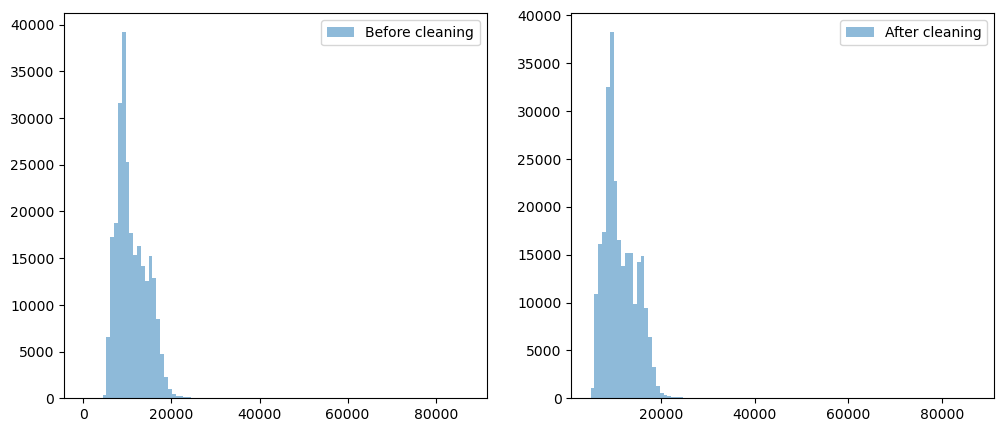

In [96]:
integrated_data = np.sum(data, axis=0)
histogram_data, bin_edges = histogram(integrated_data, bins=1000)
thres_low = bin_edges[500]
thres_hight = bin_edges[-2]

mask = (integrated_data < thres_low) | (integrated_data > thres_hight)
y, x = np.where(mask)
full_median_filter_corr_im = median_filter(integrated_data, size=2)
for y, x in zip(y, x):
    integrated_data_cleaned[y, x] = full_median_filter_corr_im[y, x]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(integrated_data.flatten(), bins=100, alpha=0.5, label="Before cleaning")
ax[1].hist(integrated_data_cleaned.flatten(), bins=100, alpha=0.5, label="After cleaning")
ax[0].legend()
ax[1].legend()

In [ ]:
data_integrated_after = integrated_data[10:-10, 10:-10].flatten()
histogram_after, bin_edges = histogram(data_integrated_after, bins=1000)
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.hist(histogram_before, bins=100, alpha=0.5, label="Before cleaning") 
ax.hist(histogram_after, bins=100, alpha=0.5, label="After cleaning") 
ax.legend()